Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


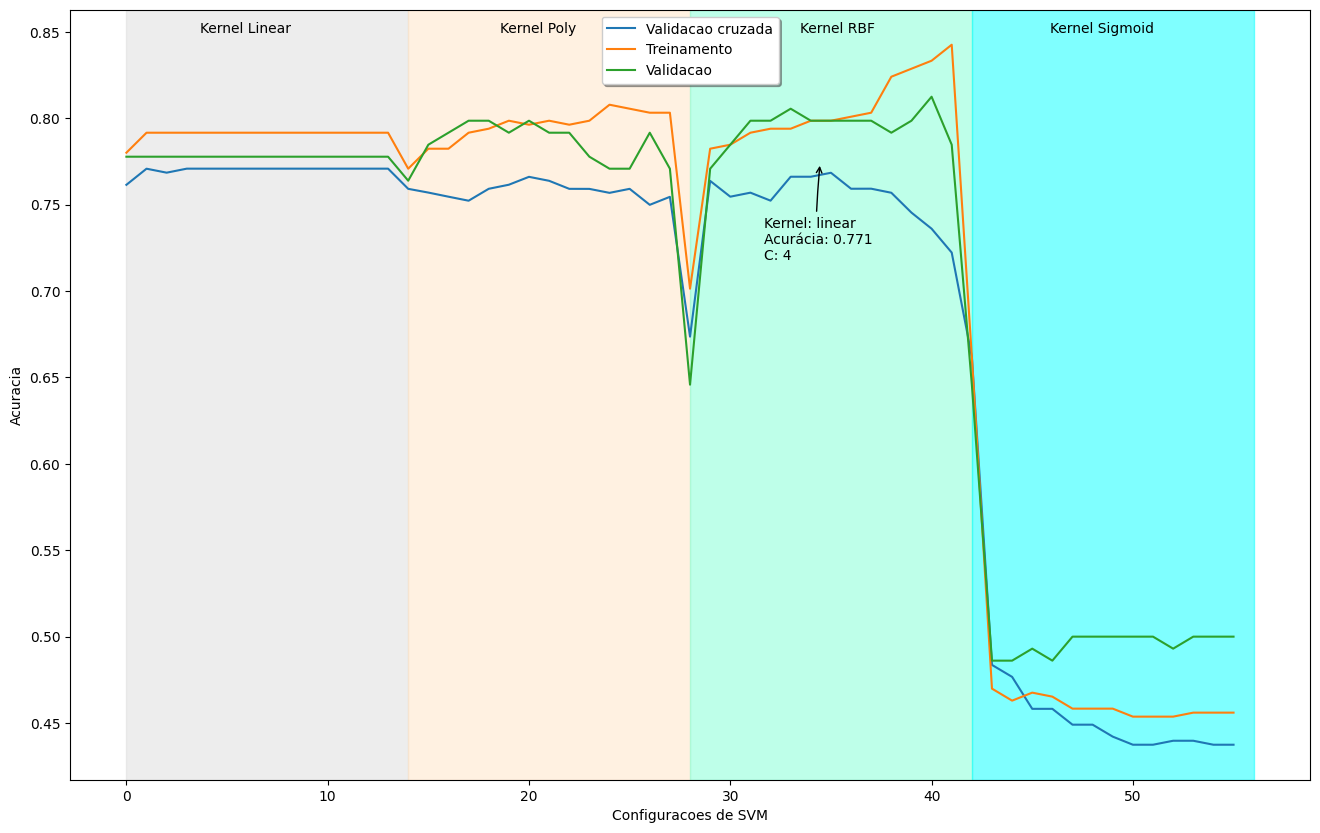

Desempenho da melhor configuracao testada:
Acuracia de treinamento clf: 0.787
Acuracia de validacao clf: 0.764
Acuracia de teste clf: 0.734


In [1]:
# USANDO O SVM NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS Kernels PARA A BASE

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.colors as mcolors
from math import ceil
plt.rcParams['figure.figsize'] = [16, 10]

#definindo os nomes de cada coluna
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe_

#construindo conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando o classificador
clf = SVC()

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)

#construindo o espaco de busca por configuracoes do classificador
kernels_range = ['linear','poly','rbf','sigmoid']
c_range =[0.1,1,2,4,5,10,15,20,30,50,100,200,500,1000]
gamma_ = [1,3,4,5,7,10,15,20,25,30,40,50,100,200,500,1000]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

# use iteration to caclulator different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
  for k in c_range:
    if(kernels_range[j]=='linear'):
      svc = LinearSVC(C=k)
    else:
      svc = SVC(C=k, kernel=kernels_range[j])
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    k_scores_cross.append(scores.mean())
    svc.fit(X_train, y_train)
    k_scores_train.append(svc.score(X_train, y_train))
    k_scores_valid.append(svc.score(X_valid, y_valid))


#encontrando a melhor configuracao testada
the_best_acc=k_scores_cross.index(max(k_scores_cross))
the_best_kernel=ceil(the_best_acc/len(c_range))-1
the_best_c = the_best_acc/len(c_range)
the_best_c = (the_best_c-int(the_best_c))*len(c_range)
st_out = ("Kernel: " + str(kernels_range[the_best_kernel])+" \nAcurácia: " +
          str(round(k_scores_cross[the_best_acc],3))+"\nC: "+str(c_range[int(the_best_c)]))

# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(200, 800), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(500, 800), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(800, 800), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(1050, 800), xycoords='figure pixels')
plt.annotate(st_out, xy=(820, 670), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.show()

#desempenho da melhor configuracao
clf = SVC(C=c_range[int(the_best_c)], kernel=kernels_range[the_best_kernel])

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)
print("Desempenho da melhor configuracao testada:")
print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
